In [1]:
pip install pandas-profiling

In [2]:
pip install --upgrade pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydantic==1.8.2

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
annotated-types               0.5.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel   

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  # Import XGBClassifier from xgboost library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("cardio_train.csv",delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Data Information, Cleaning & Visualization

In [9]:
#Age : Age of participant (integer)
#Gender : Gender of participant (male/female).
#Height : Height measured in centimeters (integer)
#Weight : Weight measured in kilograms (integer)
#Ap_hi : Systolic blood pressure reading taken from patient (integer)
#Ap_lo : Diastolic blood pressure reading taken from patient (integer)
#Cholesterol : Total cholesterol level read as mg/dl on a scale 0 - 5+ units (integer). Each unit denoting increase/decrease by 20 mg/dL respectively.
#Gluc : Glucose level read as mmol/l on a scale 0 - 16+ units (integer). Each unit denoting increase Decreaseby 1 mmol/L respectively.
#Smoke : Whether person smokes or not(binary; 0=No , 1=Yes).
#Alco : Whether person drinks alcohol or not(binary; 0=No ,1=Yes).
#Active : whether person physically active or not( Binary ; 0=No,1=Yes).
#Cardio : whether person suffers from cardiovascular diseases or not(Binary; 0=No , 1=Yes).

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: >

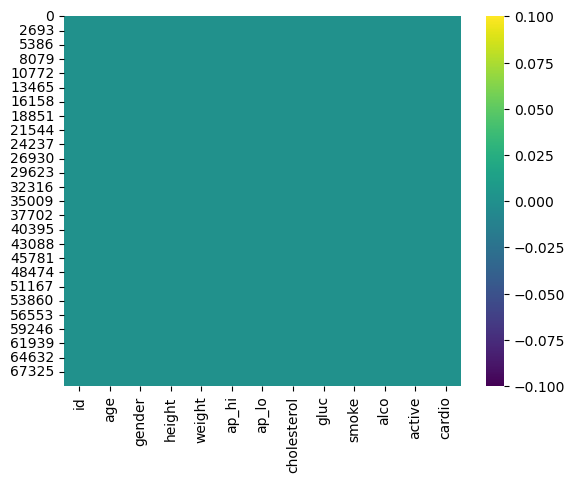

In [12]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [13]:
df.size

910000

In [14]:
df.shape

(70000, 13)

In [15]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [19]:
df['age']=df['age'].apply(lambda x: int (x/365))

In [20]:
df['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

In [21]:
df_corr = df.corr()
df_corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [22]:
mask=np.triu(df_corr)

<Axes: title={'center': 'Correlation Matrix'}>

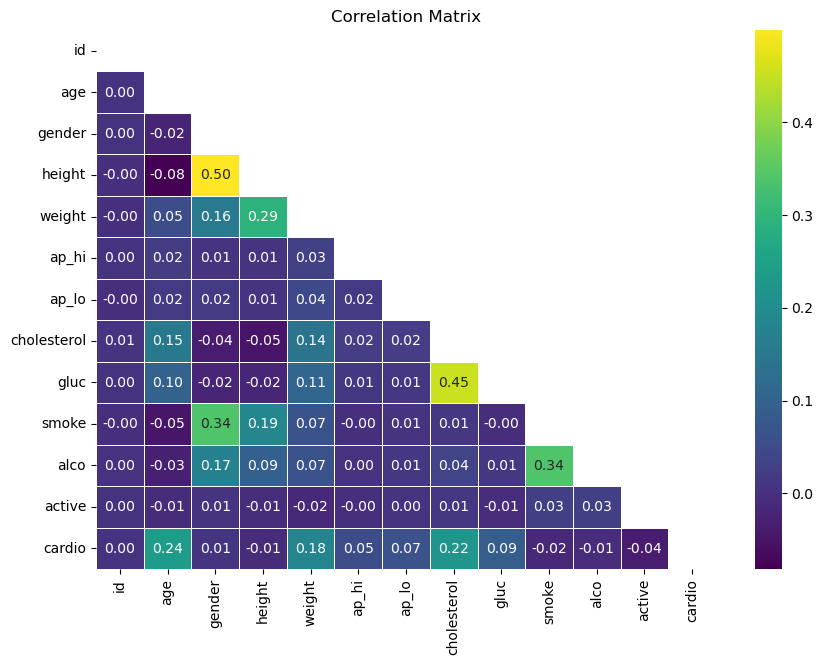

In [23]:
plt.figure(figsize = (10, 7))
plt.title("Correlation Matrix")
sns.heatmap(df_corr, cmap = 'viridis', annot = True, mask = mask, linecolor = 'white', linewidth = 0.5, fmt = '.2f')

ValueError: num must be an integer with 1 <= num <= 12, not 13

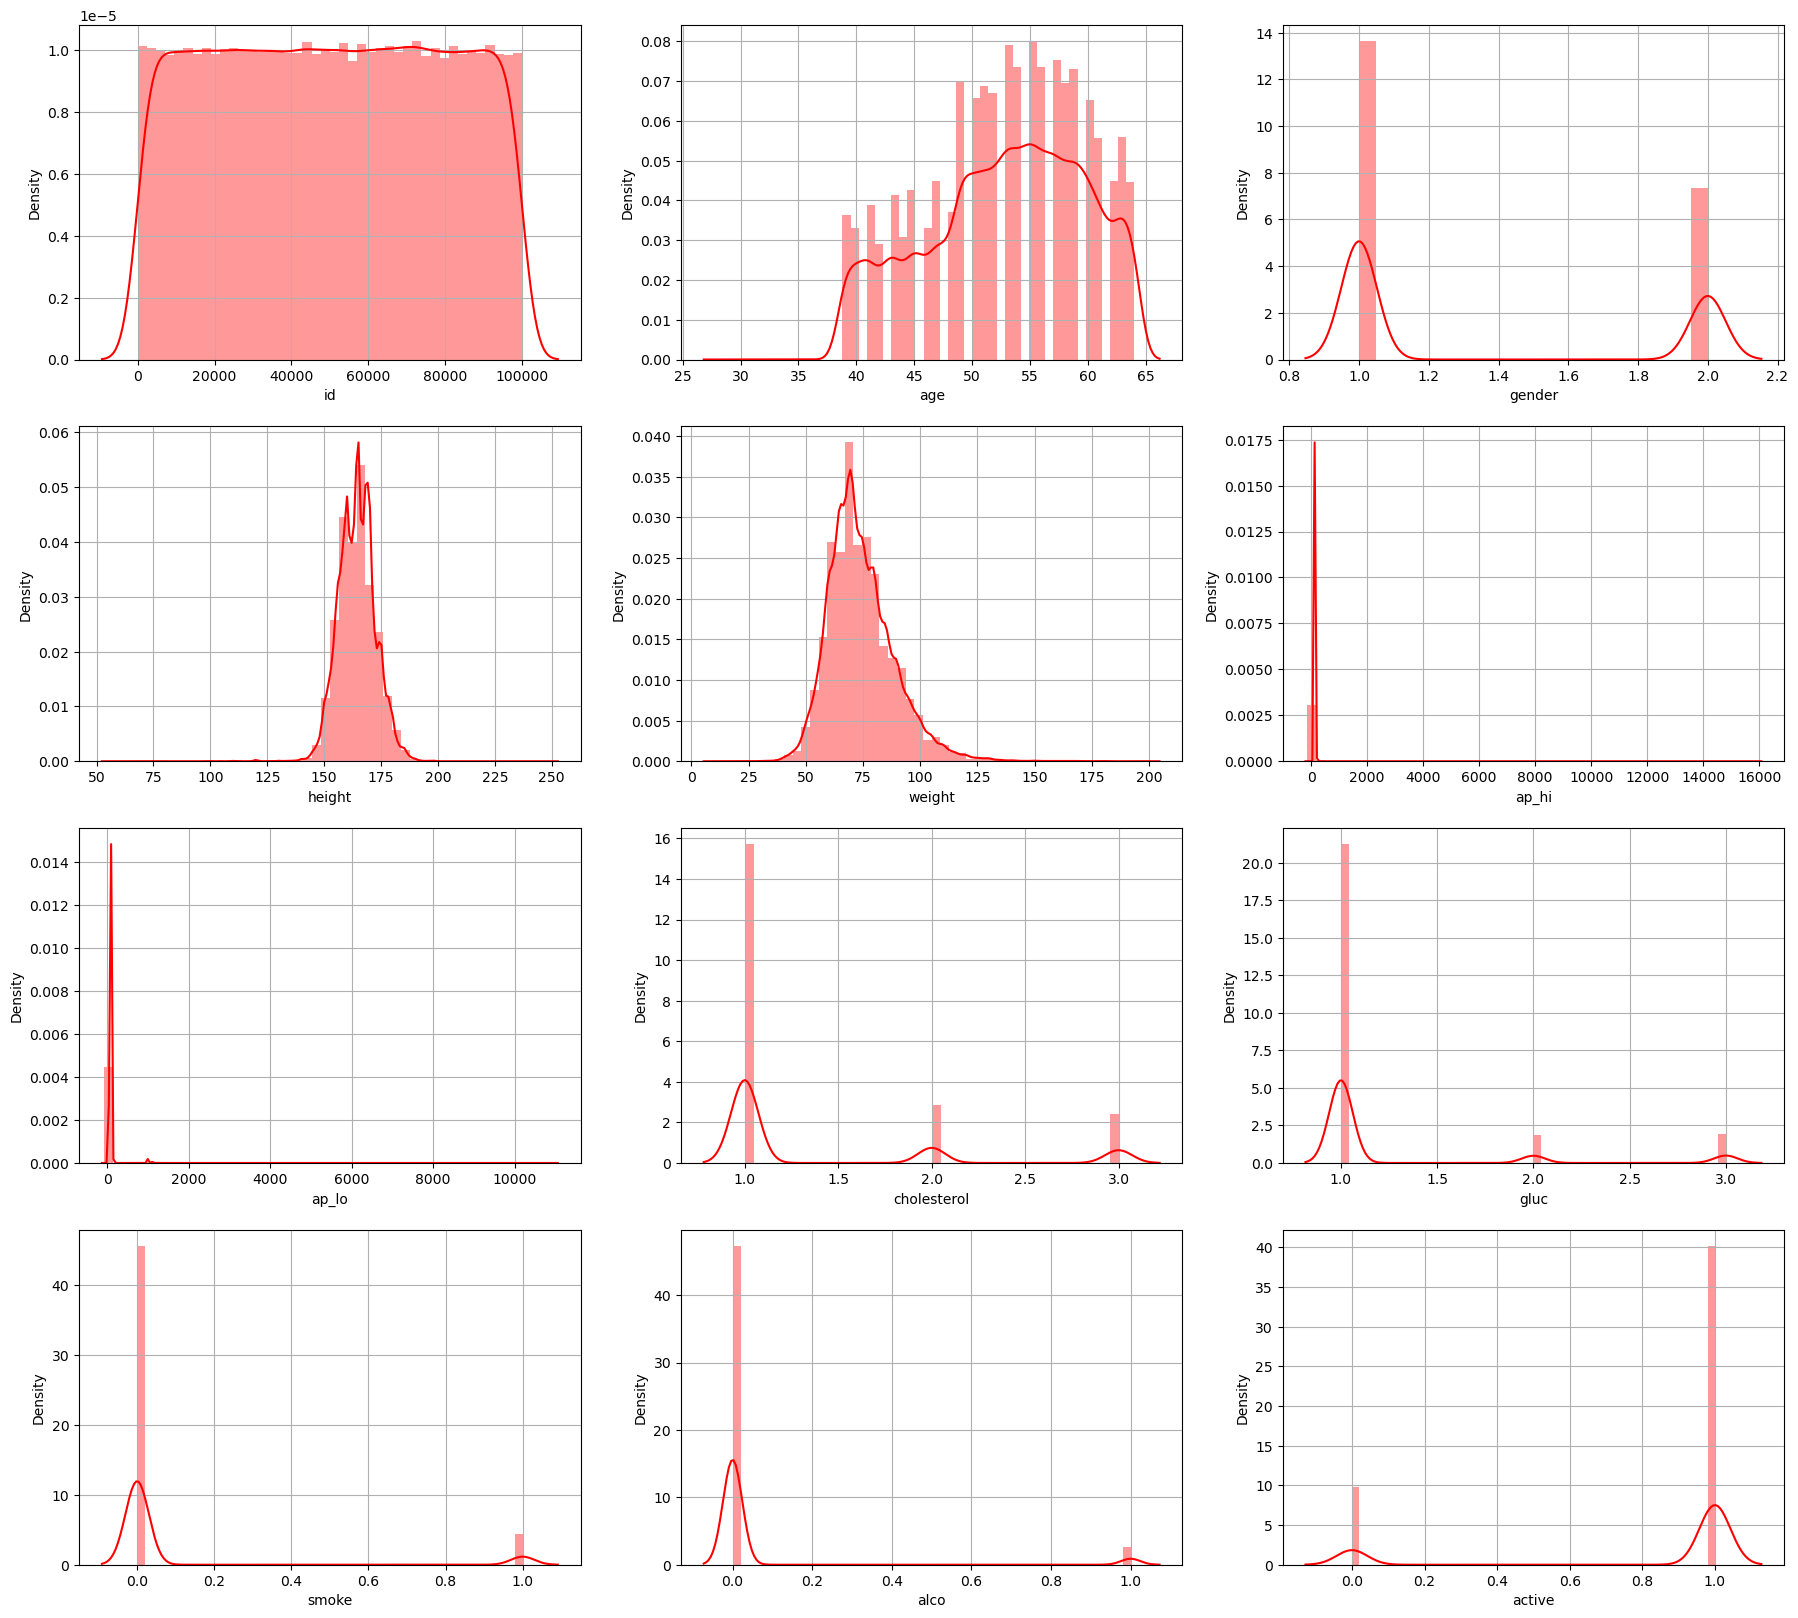

In [24]:
plt.figure(figsize = (22, 20))

for i in range(len(df.columns)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df.iloc[:, i], color = 'red')
    plt.grid()

<Axes: >

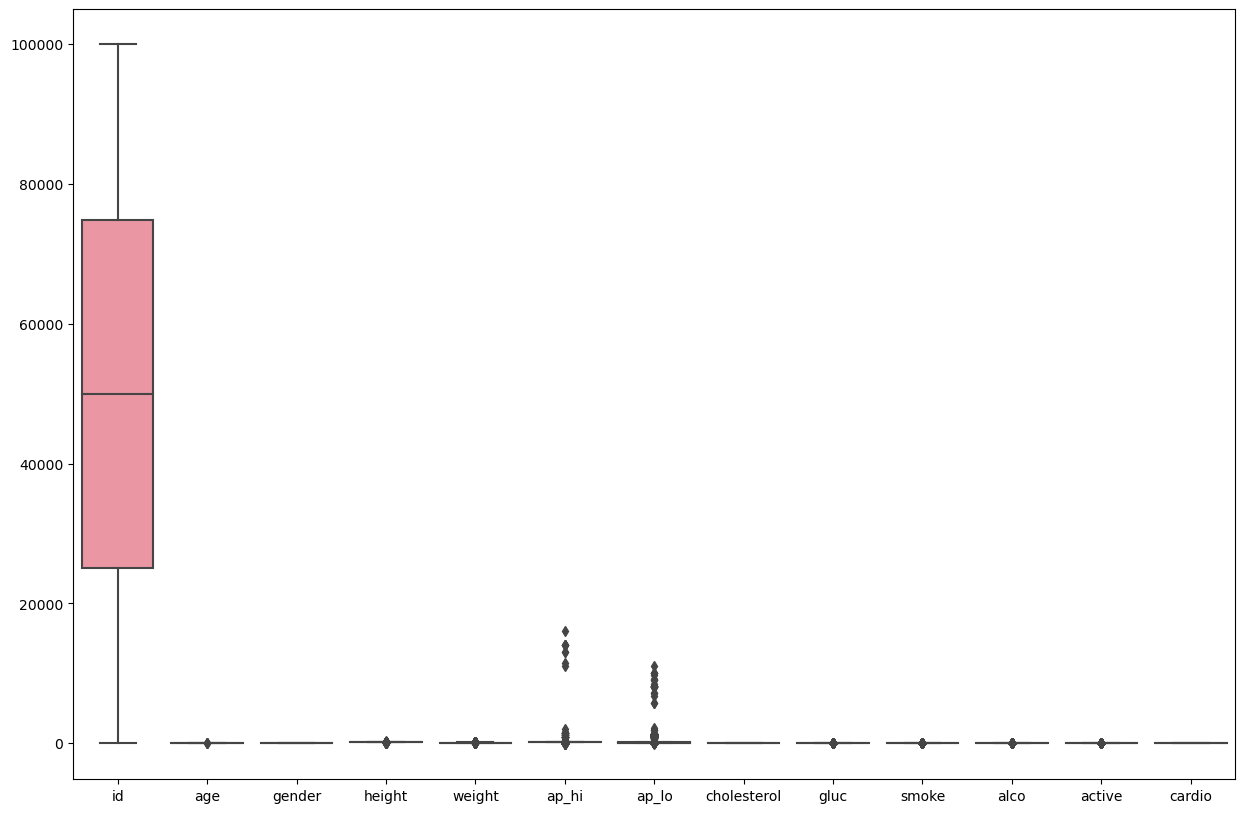

In [25]:
plt.figure(figsize = (15, 10))
sns.boxplot(df)

In [26]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

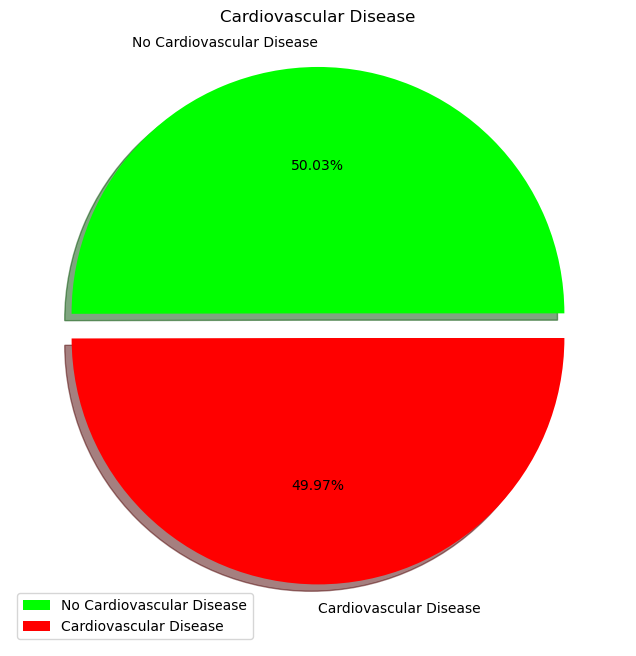

In [27]:
plt.figure(figsize = (10, 8))
plt.title('Cardiovascular Disease')
plt.pie(df['cardio'].value_counts(), labels = ['No Cardiovascular Disease', 'Cardiovascular Disease'], explode = (0.1, 0.0), colors = ['lime', 'red'],autopct = '%1.2f%%', shadow = True)
plt.legend(loc = 'best')

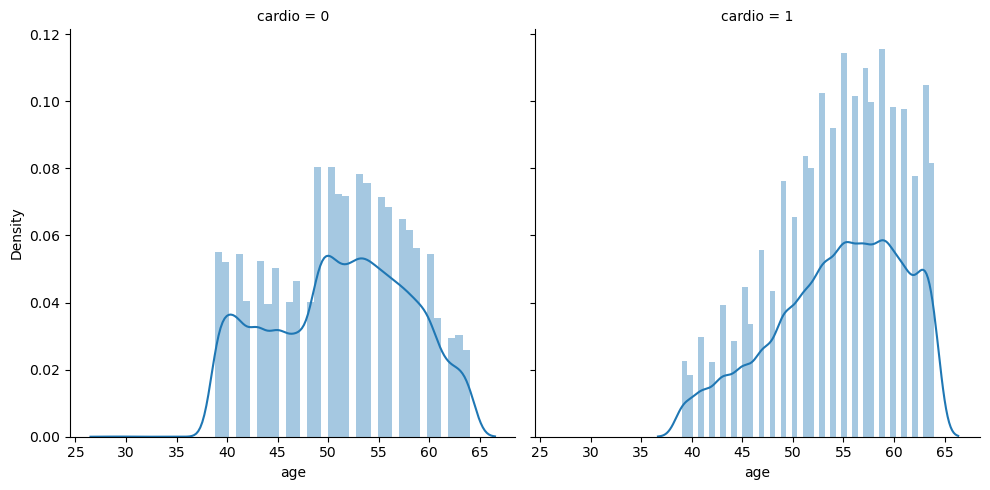

In [28]:
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "age")

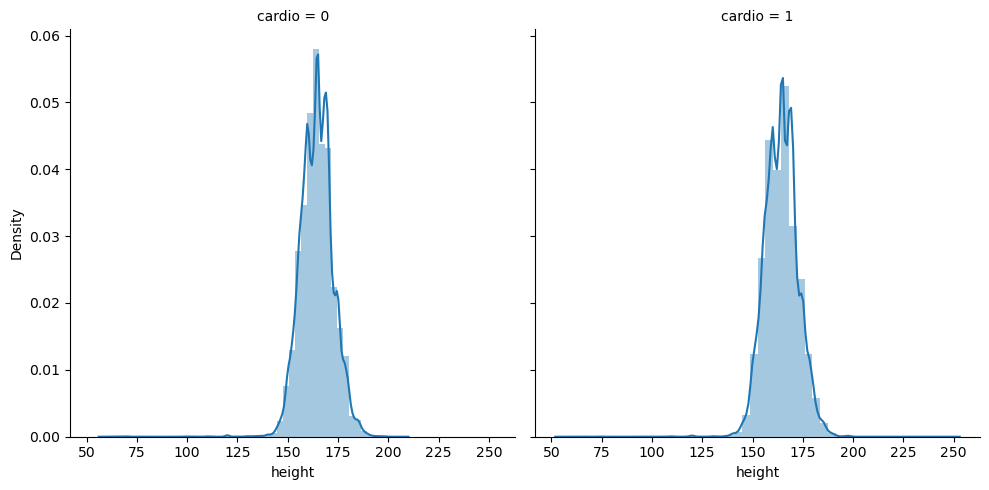

In [29]:
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "height")


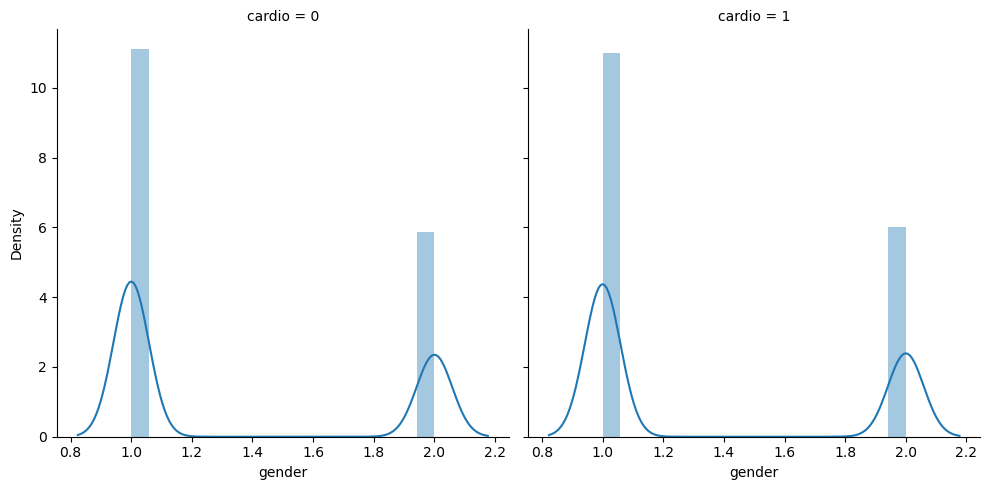

In [30]:
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "gender")


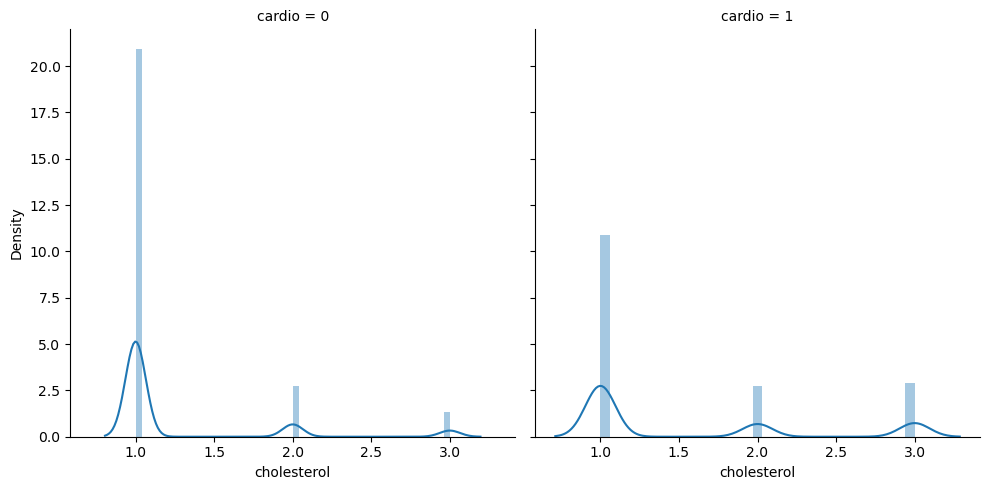

In [31]:
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "cholesterol")

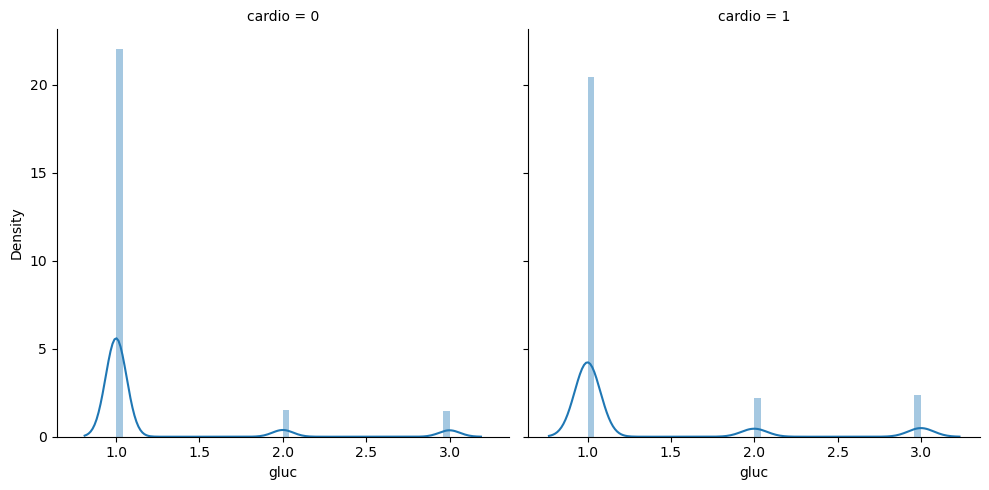

In [32]:
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "gluc")

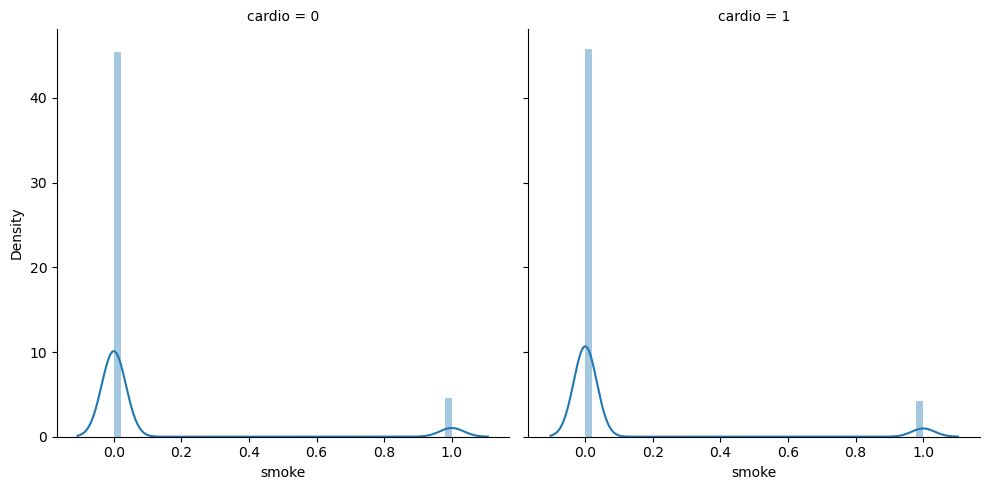

In [33]:
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "smoke")

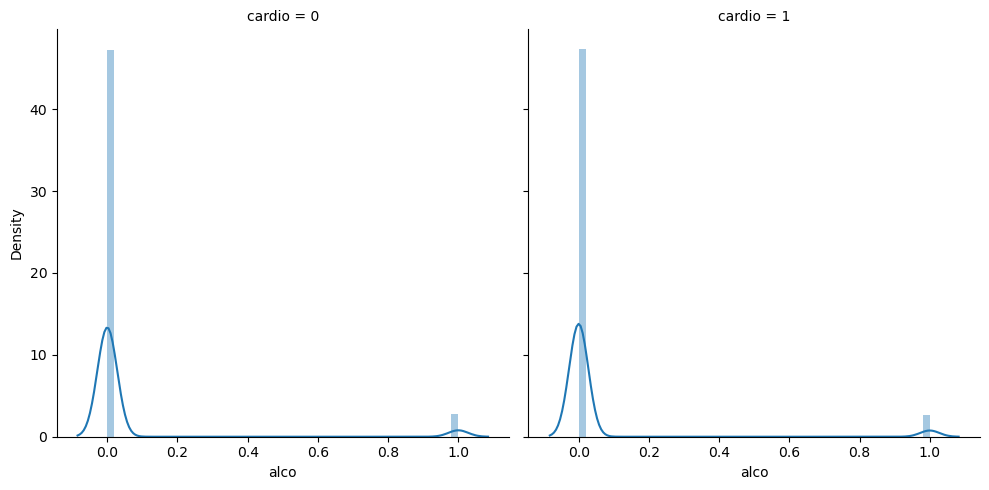

In [34]:
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "alco")

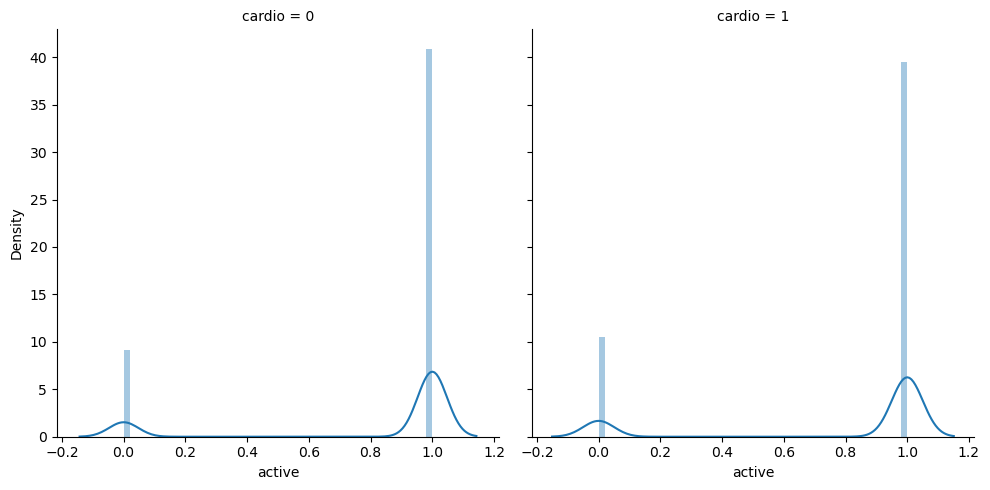

In [35]:
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "active")

# Train & Test Splitting the Data

In [36]:
x = df[df.columns.drop(['cardio'])].values
x


array([[0.0000e+00, 5.0000e+01, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.0000e+00, 5.5000e+01, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 5.1000e+01, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [9.9996e+04, 5.2000e+01, 2.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [9.9998e+04, 6.1000e+01, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.9999e+04, 5.6000e+01, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [37]:
y=df.iloc[:,-1].values
y


array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# Function to Measure Performance

In [39]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No Cardiovascular Disease', 'Cardiovascular Disease'])
    cm.plot()

# Gaussian Naive Bayes

In [40]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [41]:
y_pred_nb = model_nb.predict(x_test)

Precision :  0.7823343848580442
Recall :  0.11645379413974455
Accuracy :  0.5355714285714286
F1 Score :  0.2027303196272378

 [[10007   345]
 [ 9408  1240]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.52      0.97      0.67     10352
           1       0.78      0.12      0.20     10648

    accuracy                           0.54     21000
   macro avg       0.65      0.54      0.44     21000
weighted avg       0.65      0.54      0.43     21000

******************************************************



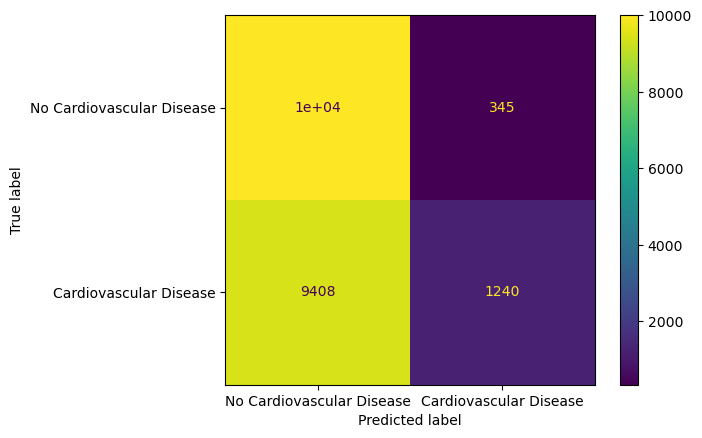

In [42]:
perform(y_pred_nb)

# Logistic Regression

In [43]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)


LogisticRegression()

In [44]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.7257010331014127
Recall :  0.6465063861758077
Accuracy :  0.6968571428571428
F1 Score :  0.6838184166087216

 [[7750 2602]
 [3764 6884]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.67      0.75      0.71     10352
           1       0.73      0.65      0.68     10648

    accuracy                           0.70     21000
   macro avg       0.70      0.70      0.70     21000
weighted avg       0.70      0.70      0.70     21000

******************************************************



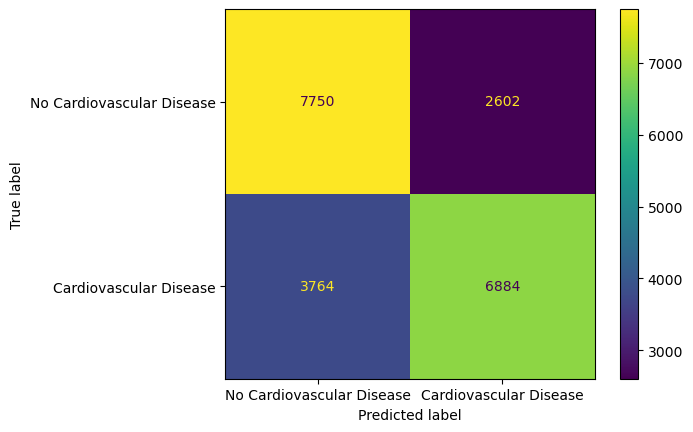

In [45]:
perform(y_pred_lr)

# XGBoost Classifier

In [47]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
y_pred_xgb = model_xgb.predict(x_test)

Precision :  0.7551880008218615
Recall :  0.6903643876784372
Accuracy :  0.7295238095238096
F1 Score :  0.7213227357472279

 [[7969 2383]
 [3297 7351]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10352
           1       0.76      0.69      0.72     10648

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000

******************************************************



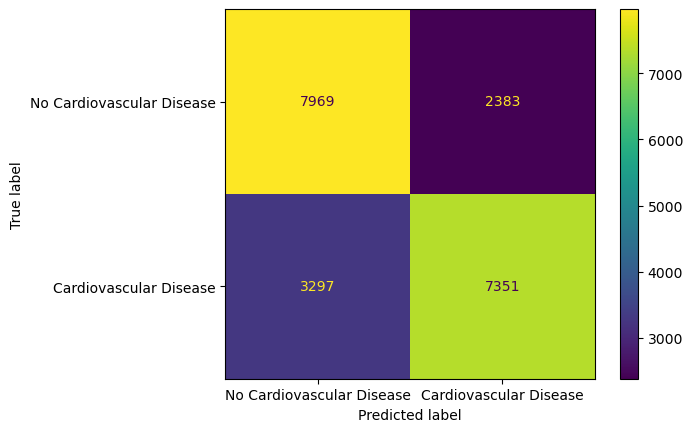

In [49]:
perform(y_pred_xgb)

# Decision Tree

In [50]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [51]:
y_pred_dt=model_dt.predict(x_test)


Precision :  0.6350434699531862
Recall :  0.6242486851990984
Accuracy :  0.6275714285714286
F1 Score :  0.6295998105612123

 [[6532 3820]
 [4001 6647]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.62      0.63      0.63     10352
           1       0.64      0.62      0.63     10648

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000

******************************************************



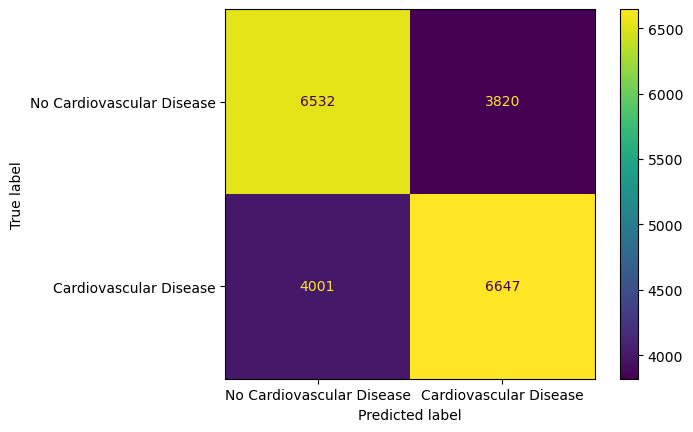

In [52]:
perform(y_pred_dt)

# Random Forest

In [53]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred_rf= model_rf.predict(x_test)


Precision :  0.7423998389369841
Recall :  0.692618332081142
Accuracy :  0.7222857142857143
F1 Score :  0.7166456126712661

 [[7793 2559]
 [3273 7375]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.70      0.75      0.73     10352
           1       0.74      0.69      0.72     10648

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000

******************************************************



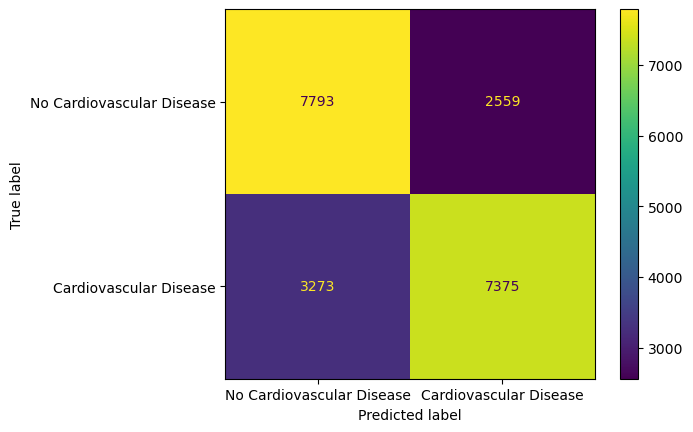

In [55]:

perform(y_pred_rf)

# Extra Trees Classifier

In [56]:
model_etc = ExtraTreesClassifier()
model_etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [59]:
y_pred_etc = model_etc.predict(x_test)

Precision :  0.7241040746195385
Recall :  0.692618332081142
Accuracy :  0.7103333333333334
F1 Score :  0.7080113281812509

 [[7542 2810]
 [3273 7375]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.70      0.73      0.71     10352
           1       0.72      0.69      0.71     10648

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000

******************************************************



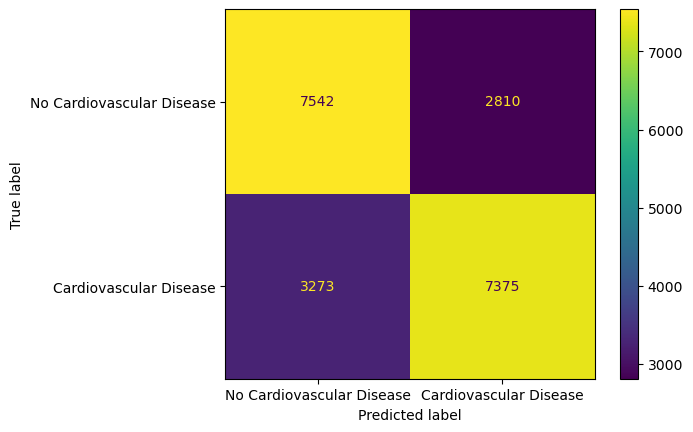

In [60]:
perform(y_pred_etc)

# Support Vector Classifier

In [62]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [64]:
y_pred_svc=model_svc.predict(x_test)

Precision :  0.5454545454545454
Recall :  0.0005634861006761833
Accuracy :  0.493
F1 Score :  0.0011258091753447792

 [[10347     5]
 [10642     6]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.49      1.00      0.66     10352
           1       0.55      0.00      0.00     10648

    accuracy                           0.49     21000
   macro avg       0.52      0.50      0.33     21000
weighted avg       0.52      0.49      0.33     21000

******************************************************



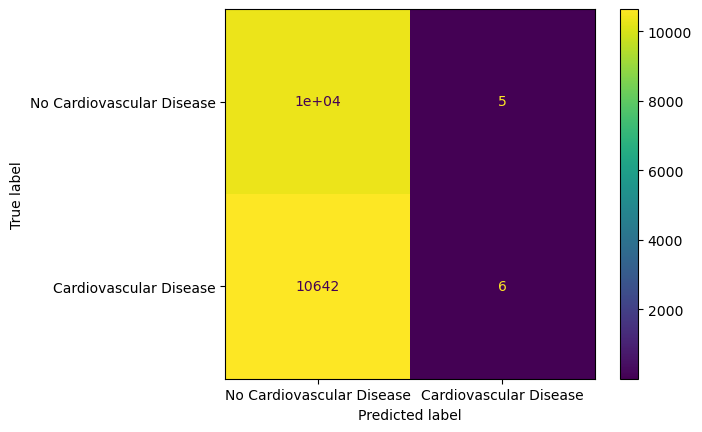

In [65]:
perform(y_pred_svc)

# Multi-Layer Perceptron

In [66]:
model_mlp = MLPClassifier(hidden_layer_sizes=(500))
model_mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=500)

In [67]:
y_pred_mlp = model_mlp.predict(x_test)


Precision :  0.8134357005758157
Recall :  0.19900450788880542
Accuracy :  0.5707142857142857
F1 Score :  0.3197766543424131

 [[9866  486]
 [8529 2119]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.54      0.95      0.69     10352
           1       0.81      0.20      0.32     10648

    accuracy                           0.57     21000
   macro avg       0.67      0.58      0.50     21000
weighted avg       0.68      0.57      0.50     21000

******************************************************



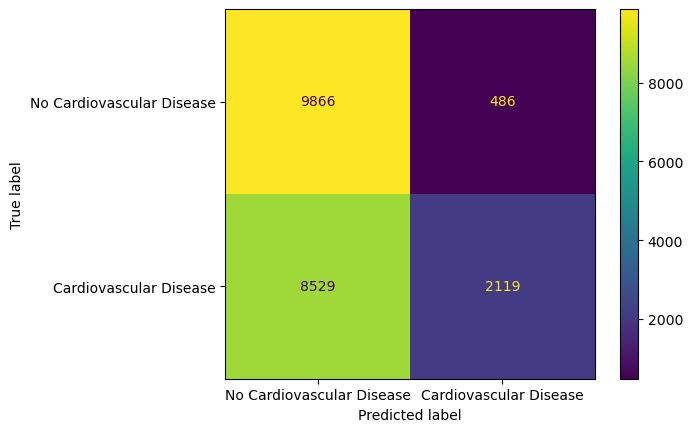

In [68]:

perform(y_pred_mlp)

Light GBM Classifier

In [69]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 24331, number of negative: 24669
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496551 -> initscore=-0.013796
[LightGBM] [Info] Start training from score -0.013796


  File "C:\Users\kunar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


LGBMClassifier()

In [70]:
y_pred_lgbm = model_lgbm.predict(x_test)

Precision :  0.7628919141914191
Recall :  0.6946844477836214
Accuracy :  0.7357142857142858
F1 Score :  0.7271922925678331

 [[8053 2299]
 [3251 7397]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10352
           1       0.76      0.69      0.73     10648

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000

******************************************************



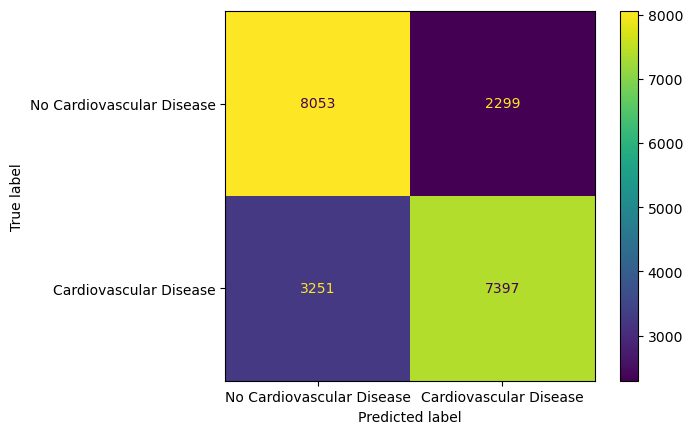

In [71]:
perform(y_pred_lgbm)

# Precision-Recall Curve

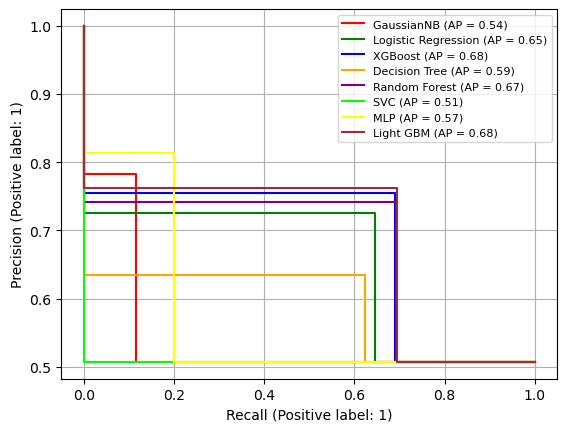

In [72]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, name = 'GaussianNB', ax = ax, color = 'red')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name = 'Logistic Regression', ax = ax, color = 'green')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name = 'XGBoost', ax = ax, color = 'blue')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name = 'Decision Tree', ax = ax, color = 'orange')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name = 'Random Forest', ax = ax, color = 'purple')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, name = 'SVC', ax = ax, color = 'lime')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mlp, name = 'MLP', ax = ax, color = 'yellow')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lgbm, name = 'Light GBM', ax = ax, color = 'brown')
plt.grid()
plt.legend(fontsize = 8, loc = 'best')

# ROC Curve

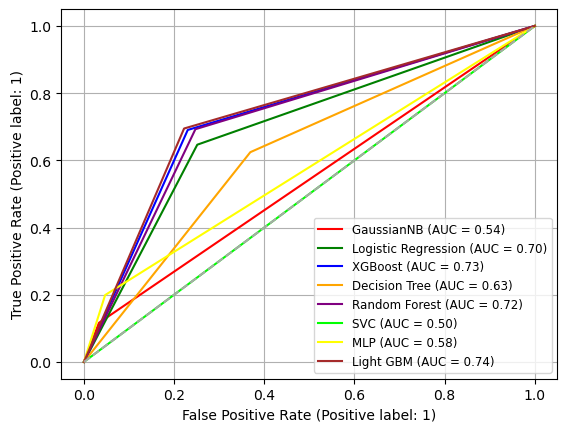

In [73]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_pred_nb, name = 'GaussianNB', ax = ax, color = 'red')
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name = 'Logistic Regression', ax = ax, color = 'green')
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name = 'XGBoost', ax = ax, color = 'blue')
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name = 'Decision Tree', ax = ax, color = 'orange')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name = 'Random Forest', ax = ax, color = 'purple')
RocCurveDisplay.from_predictions(y_test, y_pred_svc, name = 'SVC', ax = ax, color = 'lime')
RocCurveDisplay.from_predictions(y_test, y_pred_mlp, name = 'MLP', ax = ax, color = 'yellow')
RocCurveDisplay.from_predictions(y_test, y_pred_lgbm, name = 'Light GBM', ax = ax, color = 'brown')
plt.plot([0, 1], [0, 1], linestyle = "--", color = '#A8A8A8')
plt.grid()
plt.legend(fontsize = 8.5, loc = 'best')